# Lead Score Case Study



## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals of the Case Study

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. 

**Steps Undertaken**

- **Data cleaning and preparation**
   1. Reading and inspecting the dataframe
   2. Handling categorical variables
      - Mapping categorical variables to integers
      - Dummy variable creation
   3. Handling missing values
- **Test-train split and scaling**
- **Model Building**
   1. Feature elimination based on correlations
   2. Feature selection using RFE (Coarse Tuning)
   3. Manual feature elimination (using p-values and VIFs)
- **Model Evaluation**
   1. Accuracy
   2. Sensitivity and Specificity
   3. Optimal cut-off using ROC curve
   4. Precision and Recall
- **Predictions on the test set** 

## Step 1: Importing and Reading Data

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# setting option for displaying the datasets with large rows and columns 
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
# Reading the Dataset
leads =pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2 Inspecting the Dataframe

In [5]:
# Checking the number of rows and columns in the Dataframe
leads.shape

(9240, 37)

In [6]:
#checking statistical aspects of the dataframe

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#checking the Data Types of the columns
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#Checking for nulls 
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [9]:
# We observe null values in some columns

In [10]:
#checking for duplicates
leads.duplicated().sum()

0

In [11]:
#There are no duplicate rows

## Step 3 EDA




### Univariate Analysis

**Checking values of columns having categorical data**

In [12]:
# Distinct values in Prospect ID column
leads['Prospect ID'].nunique()

9240

In [13]:
# Analysing values in Lead Origin column
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

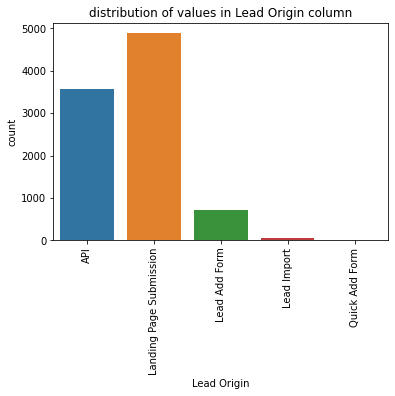

In [14]:
#Visualizing distribution of values in Lead Origin column
plt.title('distribution of values in Lead Origin column')
sns.countplot(leads['Lead Origin'])
plt.xticks(rotation=90)
plt.show()

Maximum leads origin came from landing page submission. Least almost negligible from Quick Add Form

In [15]:
# Analysing values in Lead Source column
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
welearnblog_Home        1
WeLearn                 1
Pay per Click Ads       1
youtubechannel          1
NC_EDM                  1
testone                 1
blog                    1
Name: Lead Source, dtype: int64

In [16]:
# We observe that the column has values Google and google refering to the same Value. The values needs to be cleaned

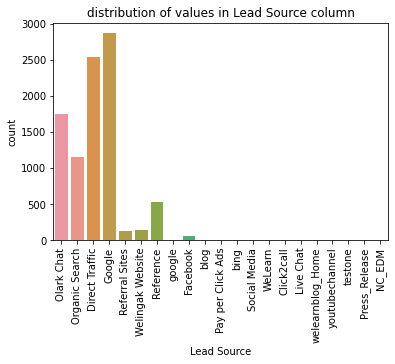

In [17]:
#Visualizing distribution of values in Lead Origin column
plt.title('distribution of values in Lead Source column')
sns.countplot(leads['Lead Source'])
plt.xticks(rotation=90)
plt.show()

In [18]:
#Maximum lead source arised from Google

In [19]:
# Analysing values in Do Not Email column
leads['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

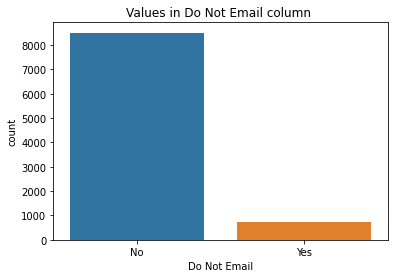

In [20]:
#Visualizing distribution of values in Do Not Email column
plt.title('Values in Do Not Email column ')
sns.countplot(leads['Do Not Email'])

plt.show()

In [21]:
#Most leads chose No for Do not Email

In [22]:
# Analysing values in Do Not Call column
leads['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

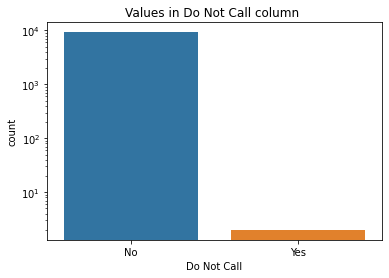

In [23]:
#Visualizing distribution of values in Do Not Call column

plt.title('Values in Do Not Call column ')
sns.countplot(leads['Do Not Call'])
plt.yscale("log")
plt.show()

In [24]:
# Mostly leads have choosen the option of No for Do not call. Yes value is comparatively negligible

In [25]:
# Analysing values in Last Activity column
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

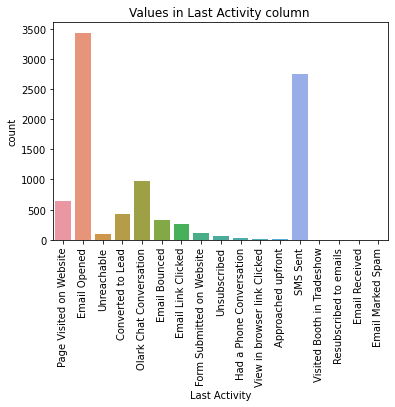

In [26]:
#Visualizing distribution of values in Last Activity column
plt.title('Values in Last Activity column ')
sns.countplot(leads['Last Activity'])
plt.xticks(rotation=90)
plt.show()

In [27]:
# Maximum values for Last Activity by the customer has been Email Opened

In [28]:
# Analysing values in Country column
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Nigeria                    4
Germany                    4
Canada                     4
South Africa               4
Sweden                     3
Italy                      2
Bangladesh                 2
Philippines                2
China                      2
Belgium                    2
Asia/Pacific Region        2
Ghana                      2
Netherlands                2
Uganda                     2
Denmark                    1
Liberia                    1
Malaysia                   1
Switzerland                1
Vietnam                    1
Indonesia                  1
Kenya         

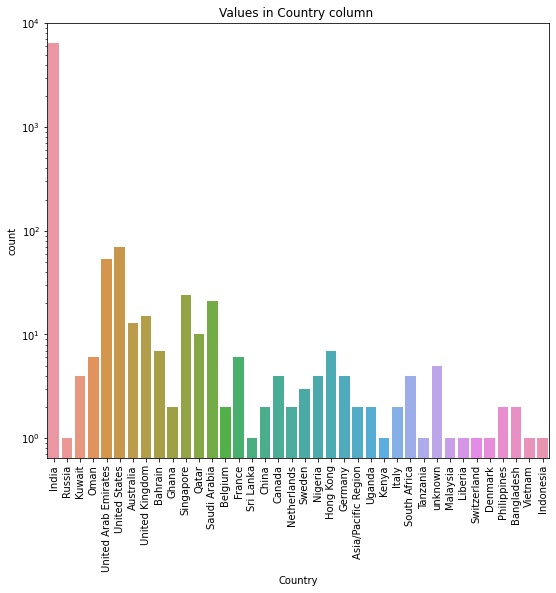

In [29]:
#Visualizing distribution of values in Country column
plt.figure(figsize=(9,8))
plt.yscale("log")
plt.title('Values in Country column ')
sns.countplot(leads['Country'])
plt.xticks(rotation=90)
plt.show()

In [30]:
# Most of records have a  value India for Country column


In [31]:
#Percentage of columns having Value India
round(len(leads[leads['Country']=='India'])/leads.shape[0]*100, 2)

70.26

In [32]:
# 70 % leads are from India. 
# X Education sells online courses for professionals. 70 % values in Country column refers to India, there are some nulls also. Country does not seem to affect leads generation

In [33]:
# Analysing values in Specialization column
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [34]:
#MAximum value for specialzation contain the value Select

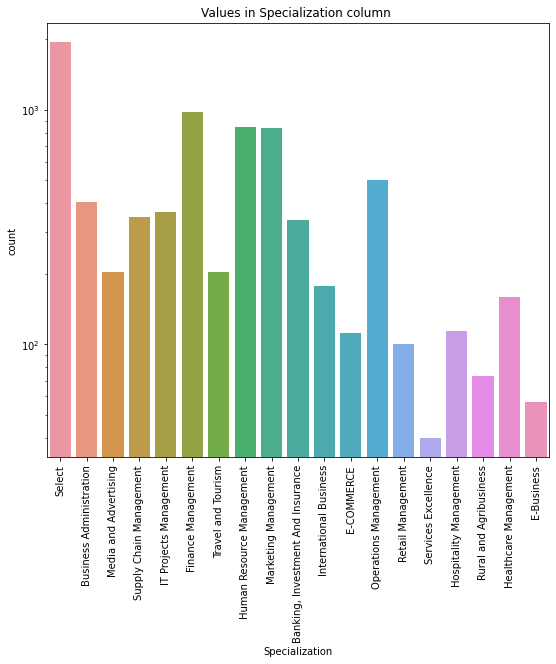

In [35]:
#Visualizing distribution of values in Specialization column
plt.figure(figsize=(9,8))
plt.yscale("log")
plt.title('Values in Specialization column ')
sns.countplot(leads['Specialization'])
plt.xticks(rotation=90)
plt.show()

In [36]:
# We observe the column Specialization contains the value Select, which is refering to the Null value in the column. 
# We will have to clean the column

In [37]:
# Analysing values in How did you hear about X Education column
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [38]:
# The Column How did you hear about X Education has  value Select implying the option was not selected (which is refering to Null value. It needs to be handled)

In [39]:
print('{} % values for the column How did you hear about X Education have values Select'.format(round(5043/len(leads)*100,2)))

54.58 % values for the column How did you hear about X Education have values Select


In [40]:
# Almost 55% values in the column is having value Select(refering to null values). We should defintiely drop this column

In [41]:
 # Analysing values in What is your current occupation column
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

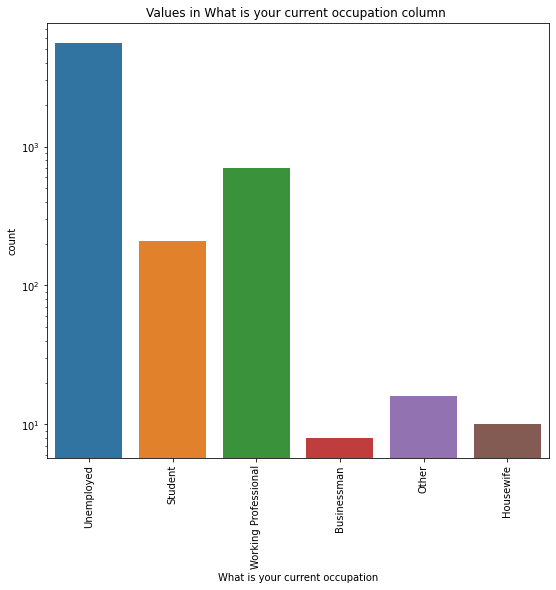

In [42]:
#Visualizing distribution of values in What is your current occupation column
plt.figure(figsize=(9,8))
plt.yscale("log")
plt.title('Values in What is your current occupation column ')
sns.countplot(leads['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

In [43]:
# Most of the leads are unemployeed. Very few of them are Businessman

In [44]:
 # Analysing values in What matters most to you in choosing a course column
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [45]:
#Most of leads exploring online courses are looking for a better career prospects

In [46]:
 # Analysing values in Search column
leads['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [47]:
# Most of the values in search column are No
print(round(9226/len(leads),3)*100,' % values are No')

99.8  % values are No


In [48]:
 # Analysing values in Magazine column
leads['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [49]:
# All the values in the column has values No. No distinct information is conveyed from this column. We may remove this column

In [50]:
# Analysing values in Newspaper Article column
leads['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [51]:
# 99% values in the column has values No. No distinct information is conveyed from this column. We may remove this column

In [52]:
# Analysing values in X Education Forums column
leads['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [53]:
# 99% values in the column has values No. No distinct information is conveyed from this column. We may remove this column

In [54]:
# Analysing values in Newspaper column
leads['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [55]:
# 99.9% values in the column has values No. No distinct information is conveyed from this column. We may remove this column

In [56]:
# Analysing values in Digital Advertisement column
leads['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [57]:
# 99% values in the column has values No. No distinct information is conveyed from this column. We may remove this column

In [58]:
# Analysing values in Through Recommendations column
leads['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [59]:
# 99% values in the column has values No. No distinct information is conveyed from this column. We may remove this column

In [60]:
# Analysing values in Receive More Updates About Our Courses column
leads['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [61]:
# 100% values in the column are No. No distinct information is conveyed from this column. We may remove this column

In [62]:
# Analysing values in Tags column
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

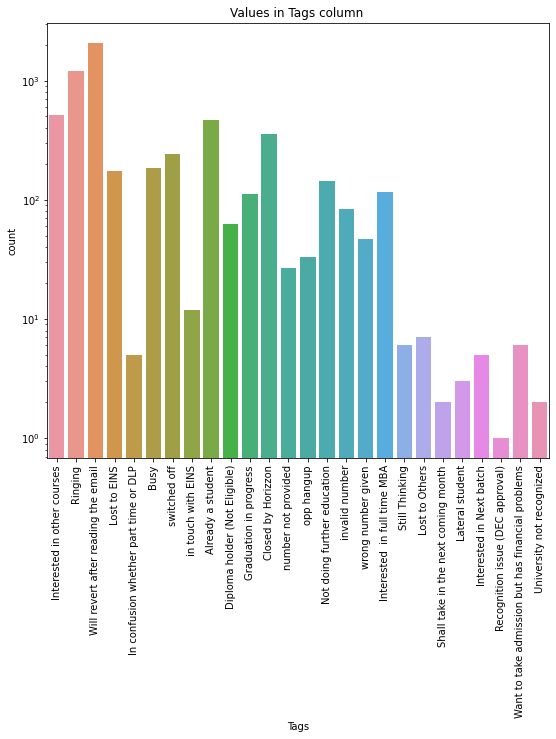

In [63]:
#Visualizing distribution of values in Tags column
plt.figure(figsize=(9,8))
plt.yscale("log")
plt.title('Values in Tags column ')
sns.countplot(leads['Tags'])
plt.xticks(rotation=90)
plt.show()

In [64]:
#Most leads are labelled with tag Will revert after reading the email

In [65]:
# Analysing values in Get updates on DM Content column
leads['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [66]:
# 100% values in the column are No. No distinct information is conveyed from this column. We may remove this column

In [67]:
# Analysing values in Lead Profile column
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [68]:
#Lead Profile columns has maximum values for value Select which is implying the option was not specified i.e. Null. We need to make suitable changes 

In [69]:
print('{} % values for the column How did you hear about X Education have values selected'.format(round(4146/len(leads)*100,2)))

44.87 % values for the column How did you hear about X Education have values selected


45% values are not specified. We must definitely drop this column

In [70]:
# Analysing values in Lead Quality column
leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

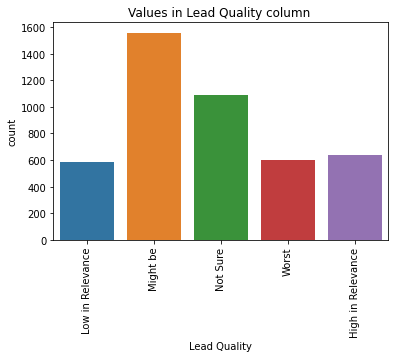

In [71]:
#Visualizing distribution of values in Lead Quality column

plt.title('Values in Lead Quality column ')
sns.countplot(leads['Lead Quality'])
plt.xticks(rotation=90)
plt.show()

In [72]:
#Most values for LEad Quality is Might be

In [73]:
# Analysing values in City column
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [74]:
#The column contains 2249 values for Select which is refering to Null value
#Mumbai, Thane, other cities of Maharashtra refer to cities of Maharashtra only
#The column does not look much relevant as X Education sells online courses.

In [75]:
# Analysing values in Asymmetrique Activity Index column
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [76]:
# Analysing values in Asymmetrique Profile Index column
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [77]:
# Analysing values in I agree to pay the amount through cheque column
leads['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [78]:
# 100% values in the column are No. No distinct information is conveyed from this column. We may remove this column

In [79]:
# Analysing values in A free copy of Mastering The Interview column
leads['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [80]:
# Analysing values in Last Notable Activity column
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
View in browser link Clicked       1
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

#### Analysing Numeric Columns

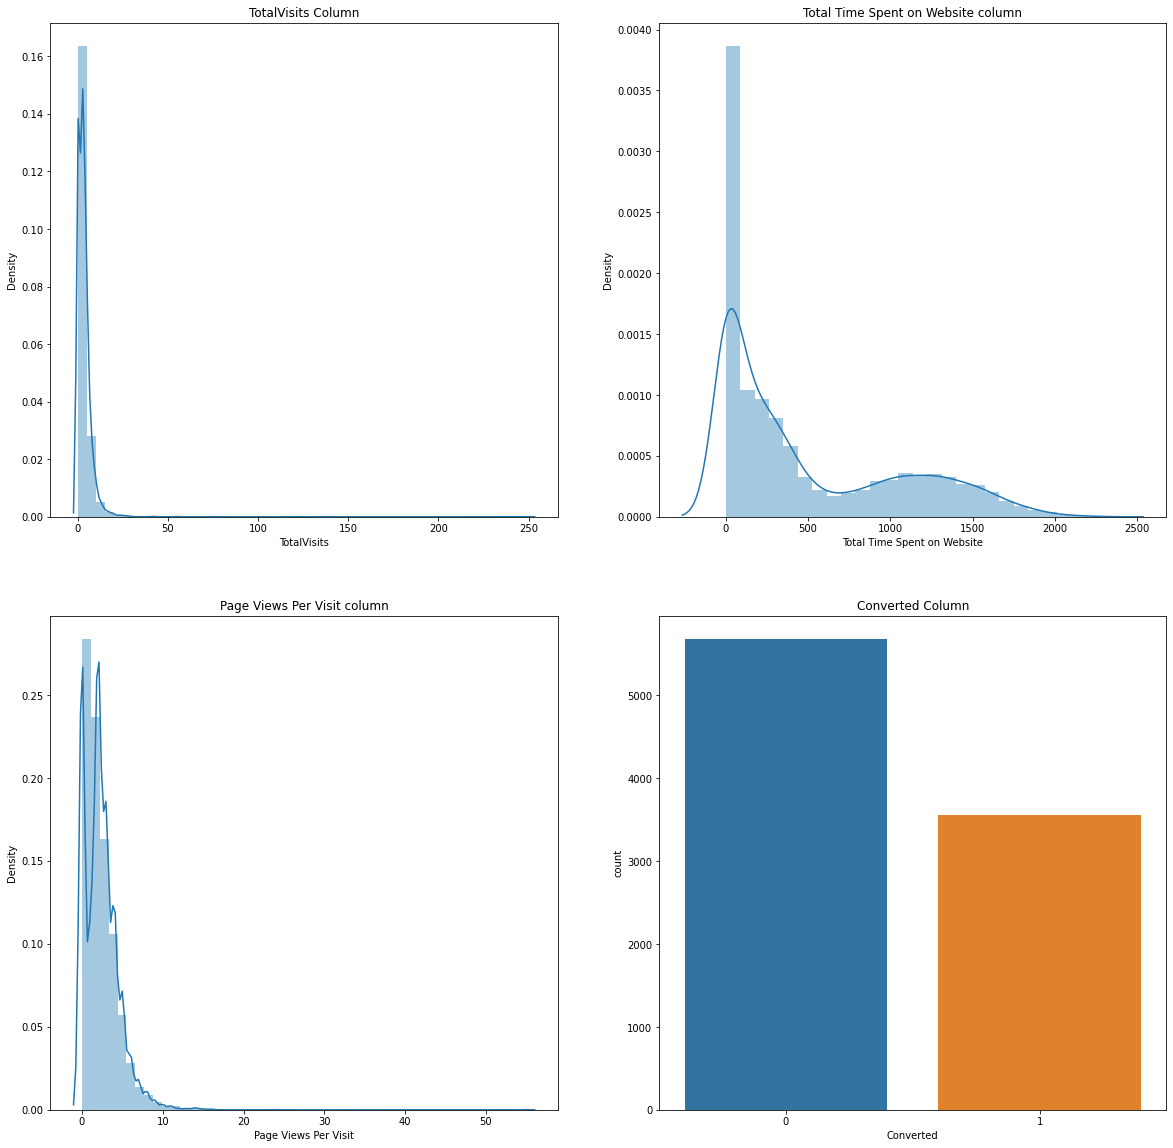

In [81]:
#Visualizing Numeric Columns
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
sns.distplot(leads['TotalVisits'])
plt.title('TotalVisits Column')
plt.subplot(2,2,2)
sns.distplot(leads['Total Time Spent on Website'])
plt.title('Total Time Spent on Website column')
plt.subplot(2,2,3)
sns.distplot(leads['Page Views Per Visit'])
plt.title('Page Views Per Visit column')
plt.subplot(2,2,4)
sns.countplot(leads['Converted'])
plt.title('Converted Column')
plt.show()

Observation
- Most of the leads did not get converted
- The density of Page Views Per Visit peeks around value 2-3
- Values in Totalvisits is left skewed. It peeks near 3

In [82]:
#Checking Converted Columns
leads['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [83]:
# Percentage of values in Converted Column
leads['Converted'].value_counts(normalize=True)

0    0.61461
1    0.38539
Name: Converted, dtype: float64

### 38.5% of leads had converted

### Bivariate Analysis

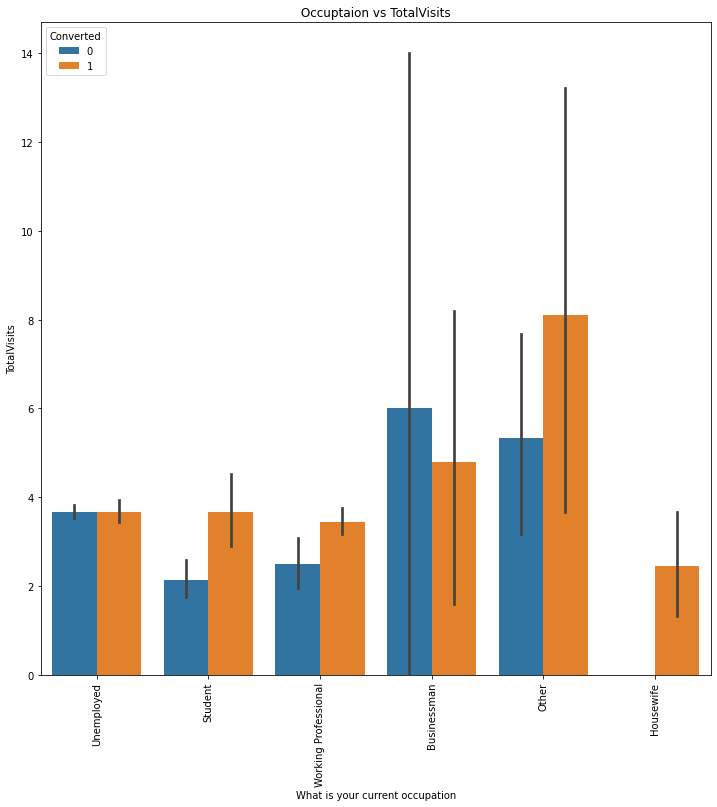

In [84]:
# Visualising Occuptaion vs TotalVisits
plt.figure(figsize=(12,12))
plt.title(" Occuptaion vs TotalVisits ")
sns.barplot( x='What is your current occupation',y='TotalVisits', data=leads, hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [85]:
# Occuptaion category Other made maximum visits and were converted the most

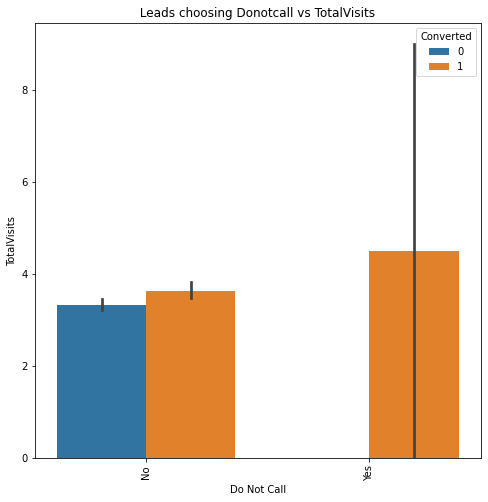

In [86]:

plt.figure(figsize=(8,8))
plt.title(" Leads choosing Donotcall vs TotalVisits ")
sns.barplot( x='Do Not Call',y='TotalVisits', data=leads, hue='Converted')
plt.xticks(rotation=90)
plt.show()

Leads whose totalvisits were higher, whether they allowed to call or not converted more

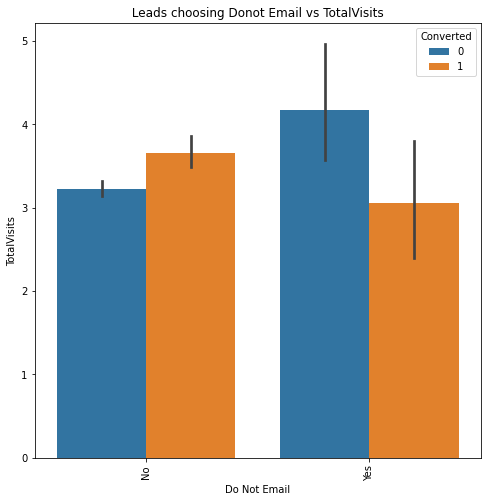

In [87]:

plt.figure(figsize=(8,8))
plt.title(" Leads choosing Donot Email vs TotalVisits ")
sns.barplot( x='Do Not Email',y='TotalVisits', data=leads, hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [88]:
# Total visits were overall higher for leads who choose Yes for Do not Email
#The conversion was higher for leads who choose No for Do Not Email

<Figure size 576x576 with 0 Axes>

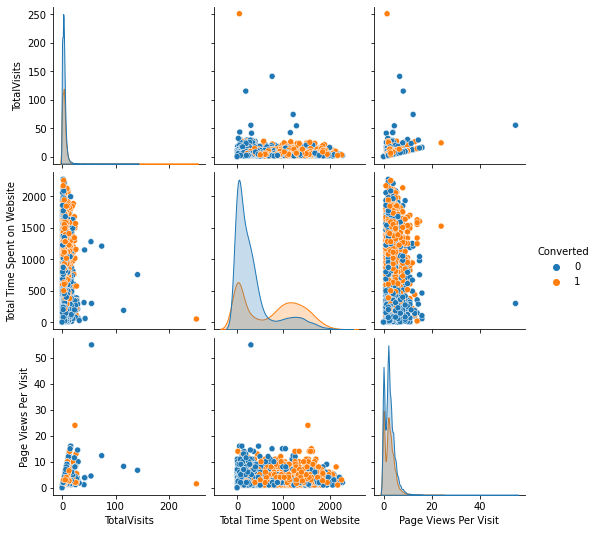

In [89]:
plt.figure(figsize=(8,8))
val=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.pairplot(data=leads,vars=val,hue='Converted')
plt.show()

In [90]:
#From the above plots we can Page views per visit and Totalvisits have some linear relation
#Total Time spent on the website was higher for cases which were converted. It seems to have an important role

### Data Cleaning





- Mapping Select values to Null value
- Cleaning Lead Source column
- Dropping irrelevant column
- Handling Missing Values

In [91]:
# Replacing 'Select' with NaN in columns
leads = leads.replace('Select',np.nan)

In [92]:
#Cleaning Lead Source column
leads['Lead Source']= leads['Lead Source'].apply(lambda x: x.capitalize() if type(x) == str else x)

In [93]:
#Value Google in the column cleaned
leads['Lead Source'].value_counts()

Google               2873
Direct traffic       2543
Olark chat           1755
Organic search       1154
Reference             534
Welingak website      142
Referral sites        125
Facebook               55
Bing                    6
Click2call              4
Live chat               2
Social media            2
Press_release           2
Welearnblog_home        1
Youtubechannel          1
Testone                 1
Pay per click ads       1
Nc_edm                  1
Blog                    1
Welearn                 1
Name: Lead Source, dtype: int64

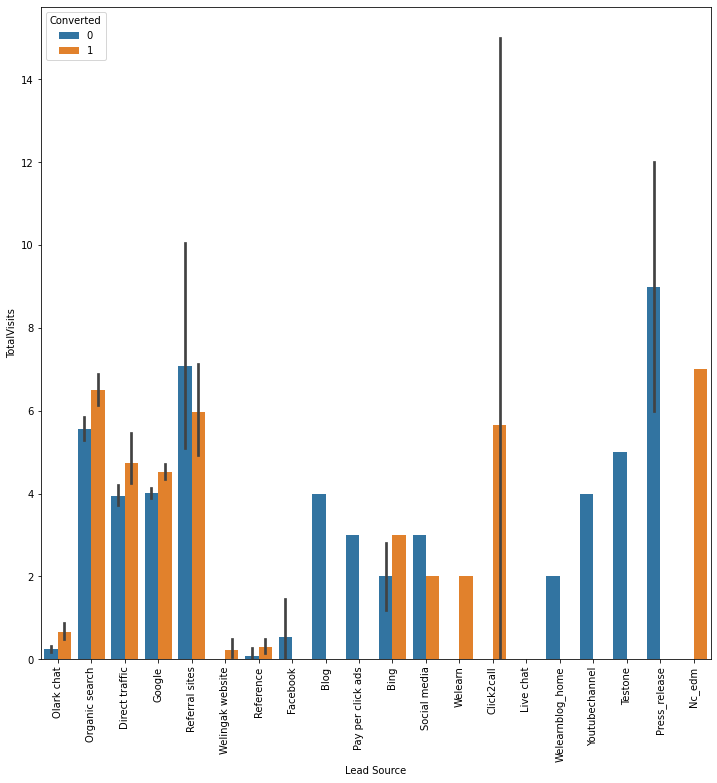

In [94]:
plt.figure(figsize=(12,12))
sns.barplot( x='Lead Source',y='TotalVisits', data=leads,hue='Converted')
plt.xticks(rotation=90)
plt.show()

In [95]:
# Nc_edm Lead source had maximum visits that converted
#Click2call source leads were all converted
# Sources like Facebook, Blog, Pay per click ads, Welearning_home, Youtubechannel, Press_release did not get converted 

**Removing Columns having no variance**

We had analysed value counts of all the columns, there were a few columns where mostly we have a No value.

It is advisible we drop these columns as they are not contributing any novel information 



In [96]:
# Dropping column with almost No variance
col=['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

df_leads =leads.drop(col,axis=1)
df_leads.shape

(9240, 25)

In [97]:
# As X Education sells online courses. The column country does not look significant and may be dropped
df_leads =df_leads.drop('Country',axis=1)
df_leads.shape

(9240, 24)

### Checking for Missing Values

In [98]:
df_leads.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Lead Number                                         0
Do Not Email                                        0
Lead Origin                 

In [99]:
# Percentage for null values
print (round(df_leads.isnull().sum()/len(df_leads),2)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Tags                                             36.0
Lead Quality                                     52.0
Lead Profile                                     74.0
City                                             40.0
Asymmetrique Activity Index 

In [100]:
#Identifying Columns with more than 35 % Null values
col= df_leads.columns
l=[]
for val in col:
    if round(df_leads[val].isnull().sum()/len(df_leads) *100, 2) >35:
        l.append(val)
print("Columns having more than 35 % Null values ",l)

Columns having more than 35 % Null values  ['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


**Dropping Columns with more than 35% Null Values**

In [101]:
#Dropping columns with more than 35% Null values
df_leads= df_leads.drop(l,axis=1)
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [102]:
# Percentage for null values remaining in the dataframe
print (round(df_leads.isnull().sum()/len(df_leads),2)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
A free copy of Mastering The Interview            0.0
Last Notable Activity                             0.0
dtype: float64


In [103]:
# As X Education sells online courses. The column What matters most to you in choosing a course does not look significant. We had seen 70% leads had chosen this option
#As mostly one is keen to undertake online courses for better career prospects, It  may be dropped as it does not seem relevant.
df_leads =df_leads.drop('What matters most to you in choosing a course',axis=1)


### Handling Missing values

In [104]:

#columns that needs to needs to be fixed

col=['TotalVisits','Page Views Per Visit','Last Activity','What is your current occupation']


In [105]:
#As the columns TotalVisits','Page Views Per Visit','Last Activity' contain Less than 1.5%  missing values. 
#We can drop these rows with null values
df_leads =df_leads[~pd.isnull(df_leads['Lead Source'])]
df_leads =df_leads[~pd.isnull(df_leads['Page Views Per Visit'])]
df_leads =df_leads[~pd.isnull(df_leads['Last Activity'])]

In [106]:
df_leads['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.856830
Working Professional    0.105930
Student                 0.032233
Other                   0.002347
Housewife               0.001408
Businessman             0.001252
Name: What is your current occupation, dtype: float64

In [107]:
#Finding the most popular value in the column
df_leads['What is your current occupation'].mode()

0    Unemployed
dtype: object

In [108]:
#imputing missing value for What is your current occupation column with mode value
impute_val={'What is your current occupation':'Unemployed'}

In [109]:
#Filling nulls in the column What is your current occupation
df_leads.fillna(value=impute_val, inplace=True)

In [110]:
#Checking the nulls after handling null values
df_leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [111]:
# The data can be cleaned. WE can now proceed to the next step

## Step 4 Data Preparation





**Converting some binary variables (Yes/No) to 1/0**

In [112]:
# List of variables to map

varlist =  ['Do Not Email', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df_leads[varlist] = df_leads[varlist].apply(binary_map)

In [113]:
#checking values after mapping yes no to 1/0
df_leads[varlist].head()

,Do Not Email,A free copy of Mastering The Interview
0,0,0
1,0,0
2,0,1
3,0,0
4,0,0


**For categorical variables with multiple levels, create dummy features (one-hot encoded)**

In [114]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   int64  
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  What is your current occupation         9074 non-null   obje

In [115]:
# Creating a dummy variable for the categorical variables and dropping the first one.

dummy1 = pd.get_dummies(df_leads[['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation','Last Notable Activity']], drop_first=True)
# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy1], axis=1)



**Dropping the repeated variables**

In [116]:
# We have created dummies for the below variables, so we can drop them from the dataset
df_leads = df_leads.drop(['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation','Last Notable Activity'], 1)

In [117]:
#checking datatypes after dummy variable creation
df_leads.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 66 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Prospect ID                                           9074 non-null   object 
 1   Lead Number                                           9074 non-null   int64  
 2   Do Not Email                                          9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   A free copy of Mastering The Interview                9074 non-null   int64  
 8   Lead Origin_Landing Page Submission                   9074

In [118]:
#ProspectID is not significant we may drop it from train test set from our model building
# All categorical columns have been converted to numeric



**Checking for Outliers**

In [119]:
# Checking for outliers in the continuous variables
num_leads = df_leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [120]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [121]:
#There are some extreme values in TotalVisits, Page Views Per Visit Columns

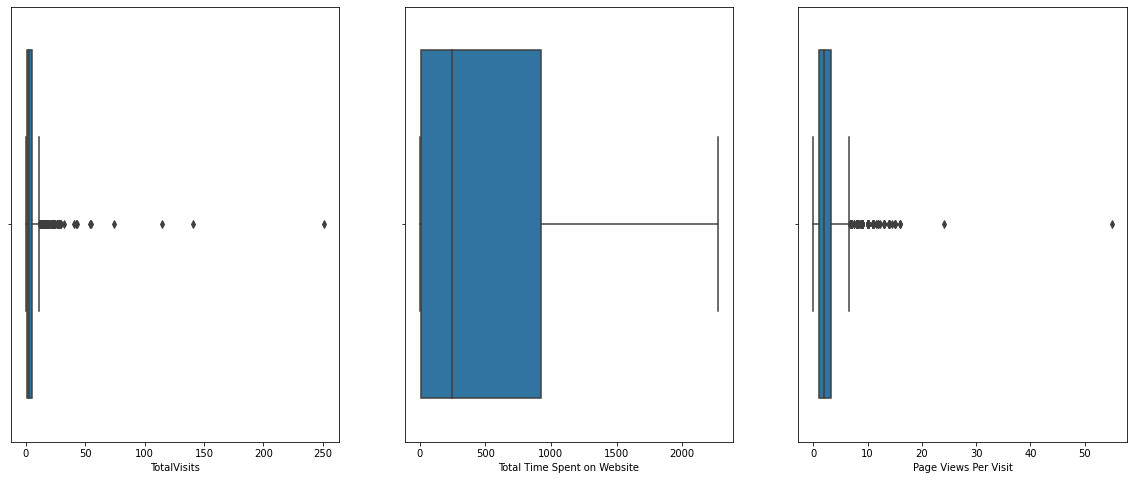

In [122]:
plt.figure(figsize=(20,8))
col=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.subplot(1,3,1)
sns.boxplot(data=df_leads, x='TotalVisits')
plt.subplot(1,3,2)
sns.boxplot(data=df_leads, x='Total Time Spent on Website')
plt.subplot(1,3,3)
sns.boxplot(data=df_leads, x='Page Views Per Visit')
plt.show()

There are some extreme values in TotalVisits and Pageviews Per visit column.We should not drop/cap these valuues as it may impact our analysis

## Step 5: Test-Train Split

In [123]:
# Putting feature variable to X
X = df_leads.drop(['Prospect ID','Lead Number','Converted'], axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [124]:
#Putting target column to y
y=df_leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [125]:
#Splitting the data into train test set
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)


## Step 6: Feature Scaling

In [126]:
#instantiation object of standard scaler
scaler = StandardScaler()

In [127]:
#Scaling continous values columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Reference,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1943,0,-0.304688,1.704380,-0.169010,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456,0,-0.304688,-0.789845,-0.169010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6547,0,0.326520,-0.176811,1.206110,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8836,0,0.116117,2.117949,0.747736,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6529,0,0.326520,0.315446,1.206110,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Step 7: Looking at Correlations

In [128]:
# Defining set of important columns
a=['Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'A free copy of Mastering The Interview', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Click2call', 'Lead Source_Direct traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Nc_edm', 'Lead Source_Olark chat', 'Lead Source_Organic search', 'Lead Source_Pay per click ads', 'Lead Source_Press_release', 'Lead Source_Reference', 'Lead Source_Referral sites', 'Lead Source_Social media', 'Lead Source_Testone', 'Lead Source_Welearn', 'Lead Source_Welearnblog_home', 'Lead Source_Welingak website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradeshow']

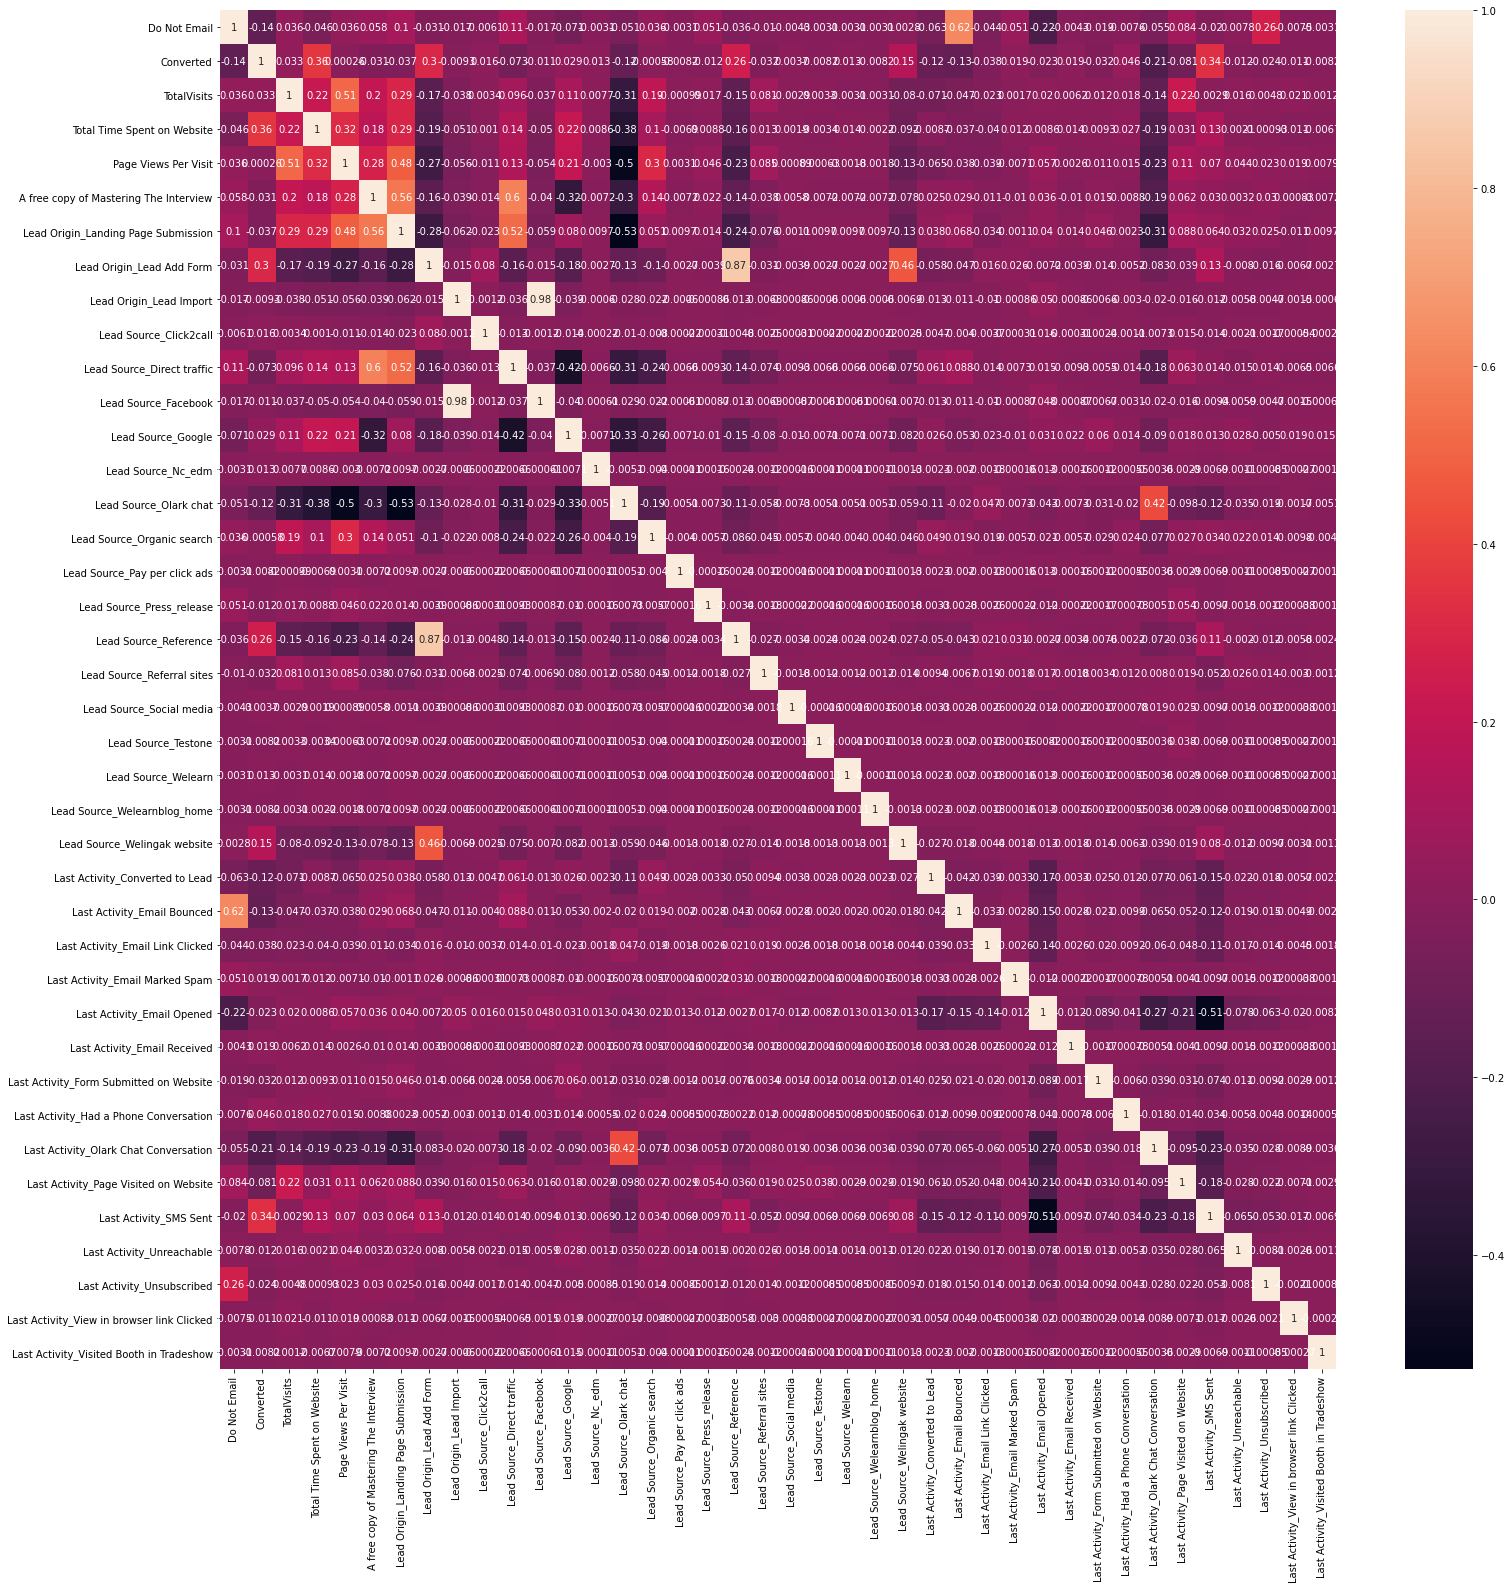

In [129]:
# Let's see the correlation matrix 
plt.figure(figsize = (25,25))        
sns.heatmap(df_leads[a].corr(),annot = True)
plt.show()

In [130]:
#we observe some high correlated features. Exploring further with subset of columns

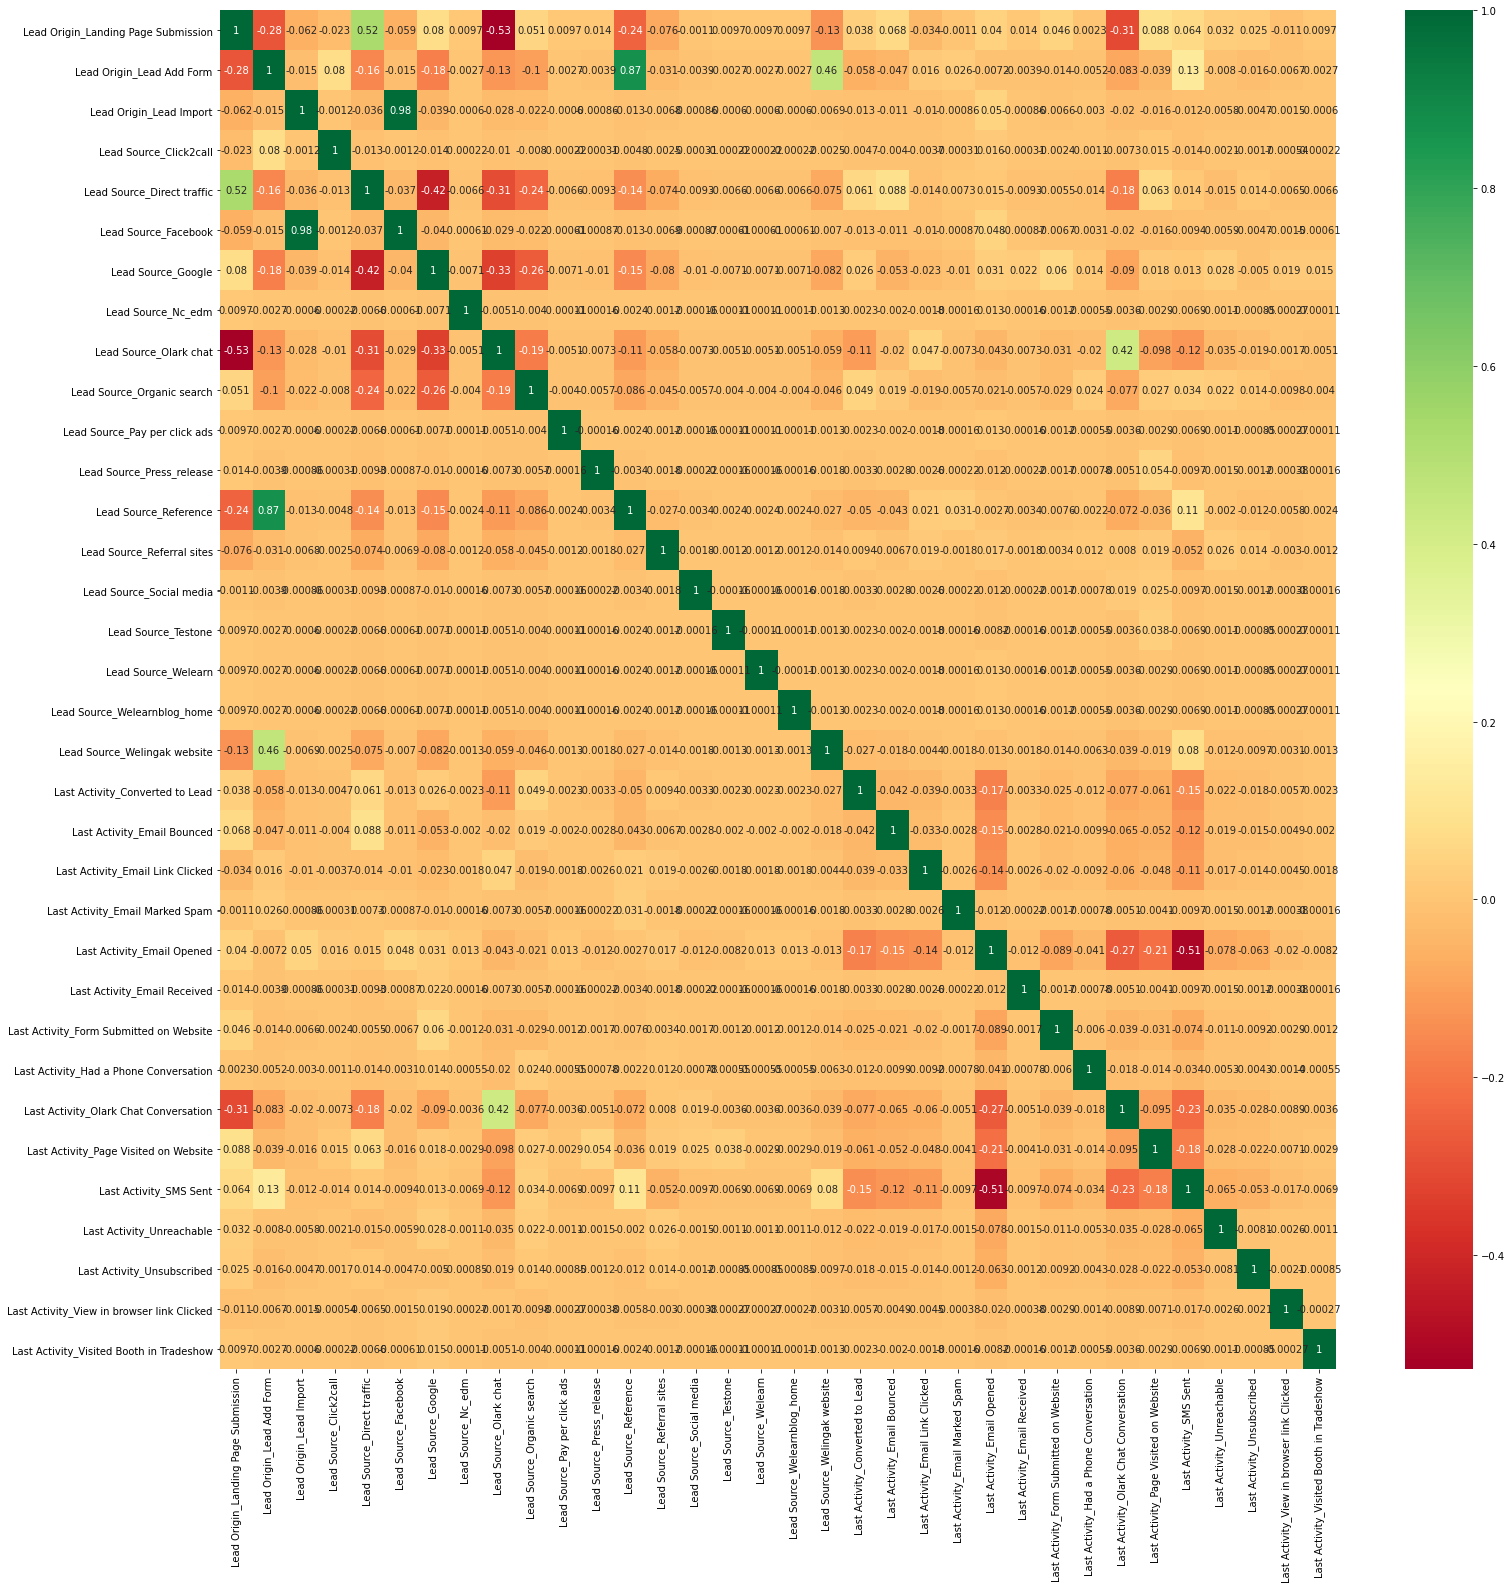

In [131]:
# Exploring correaltions with subset of columns
a=['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Click2call', 'Lead Source_Direct traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Nc_edm', 'Lead Source_Olark chat', 'Lead Source_Organic search', 'Lead Source_Pay per click ads', 'Lead Source_Press_release', 'Lead Source_Reference', 'Lead Source_Referral sites', 'Lead Source_Social media', 'Lead Source_Testone', 'Lead Source_Welearn', 'Lead Source_Welearnblog_home', 'Lead Source_Welingak website', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradeshow']
plt.figure(figsize = (25,25))
sns.heatmap(df_leads[a].corr(),annot = True,cmap='RdYlGn')
plt.show()

'Lead_Source_Facebook' is strongly correlated to 'Lead Origin_Lead Import'
'Lead_Source_Reference'is strongly correlated to 'Lead Origin_Lead Add Form'

We keep one of these pairs and drop the other


**Dropping highly correlated dummy variables**

In [132]:
#Dropping highly correlated dummy variables from train and set set
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Source_Reference'], 1)
X_train = X_train.drop(['Lead Origin_Lead Import','Lead Source_Reference'], 1)

In [133]:
#Analysing columns in train set
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 1943 to 7413
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          6351 non-null   int64  
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   float64
 3   Page Views Per Visit                                  6351 non-null   float64
 4   A free copy of Mastering The Interview                6351 non-null   int64  
 5   Lead Origin_Landing Page Submission                   6351 non-null   uint8  
 6   Lead Origin_Lead Add Form                             6351 non-null   uint8  
 7   Lead Source_Blog                                      6351 non-null   uint8  
 8   Lead Source_Click2call                                6

## Step 8: Model Building

**Running the First Training Model**

In [134]:
#Checking top 5 rows of the train set
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Blog,Lead Source_Click2call,Lead Source_Direct traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live chat,Lead Source_Nc_edm,Lead Source_Olark chat,Lead Source_Organic search,Lead Source_Pay per click ads,Lead Source_Press_release,Lead Source_Referral sites,Lead Source_Social media,Lead Source_Testone,Lead Source_Welearn,Lead Source_Welearnblog_home,Lead Source_Welingak website,Lead Source_Youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1943,0,-0.304688,1.704380,-0.169010,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
456,0,-0.304688,-0.789845,-0.169010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6547,0,0.326520,-0.176811,1.206110,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8836,0,0.116117,2.117949,0.747736,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6529,0,0.326520,0.315446,1.206110,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [135]:
# Bilding Logistic regression model with all variables
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6295
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.5
Date:                Mon, 06 Sep 2021   Deviance:                       5175.1
Time:                        22:52:42   Pearson chi2:                 6.53e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.1847   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Do Not Email                                            -1.2659      0.213     -5.941      0.000      -1.684      -0.848
TotalVisits                                              0.3124      0.062      5.047      0.000       0.191       0.434
Total Time Spent on Website                              1.1214      0.041     27.476      0.000       1.041       1.201
Page Views Per Visit                                    -0.1412      0.055     -2.576      0.010      -0.249      -0.034
A free copy of Mastering The Interview                  -0.0155      0.107     -0.145      0.884      -0.225       0.194
Lead Origin_Landing Page Submission                     -0.1943      0.107     -1.815      0.069      -0.404       0.015
Lead Origin_Lead Add Form                                2.6257      1.140      2.304      0.021       0.392       4.859
Lead Source_Blog                                       -23.5489   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Click2call                                  -1.9776      1.534     -1.290      0.197      -4.983       1.028
Lead Source_Direct traffic                              -1.1936      1.133     -1.053      0.292      -3.415       1.027
Lead Source_Facebook                                     0.1942      1.225      0.158      0.874      -2.207       2.596
Lead Source_Google                                      -0.8790      1.132     -0.777      0.437      -3.097       1.339
Lead Source_Live chat                                   20.7105   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Nc_edm                                      22.7191   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark chat                                   0.0626      1.131      0.055      0.956      -2.153       2.278
Lead Source_Organic search                              -1.0623      1.134     -0.936      0.349      -3.286       1.161
Lead Source_Pay per click ads                          -22.4152   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_release                            -1.628e-09   4.72e-06     -0.000      1.000   -9.25e-06    9.25e-06
Lead Source_Referral sites                              -1.2683      1.172     -1.082      0.279      -3.566       1.029
Lead Source_Social media                                 1.3636      1.866      0.731      0.465      -2.294       5.021
Lead Source_Testone                                    -22.3562   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welearn                                     22

We observe many columns are having high p-values.

We will first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

## Step 9: Feature Selection Using RFE

In [136]:
logreg = LogisticRegression()

**Creating model with top 15 features**

In [137]:
#Running RFE with the output number of the variable equal to 15
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [138]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False])

In [139]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 29),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 34),
 ('A free copy of Mastering The Interview', False, 43),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Blog', False, 11),
 ('Lead Source_Click2call', False, 7),
 ('Lead Source_Direct traffic', True, 1),
 ('Lead Source_Facebook', False, 18),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live chat', False, 41),
 ('Lead Source_Nc_edm', False, 20),
 ('Lead Source_Olark chat', False, 19),
 ('Lead Source_Organic search', True, 1),
 ('Lead Source_Pay per click ads', False, 32),
 ('Lead Source_Press_release', False, 46),
 ('Lead Source_Referral sites', True, 1),
 ('Lead Source_Social media', False, 17),
 ('Lead Source_Testone', False, 33),
 ('Lead Source_Welearn', False, 27),
 ('Lead Source_Welearnblog_home', False, 24),
 ('Lead Source_Welingak website', True, 1),
 ('Lead Source_Youtubechannel

In [140]:
# Intialising col with features selected from RFE
col = X_train.columns[rfe.support_]

In [141]:
#Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Blog',
       'Lead Source_Click2call', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Live chat', 'Lead Source_Nc_edm', 'Lead Source_Olark chat',
       'Lead Source_Pay per click ads', 'Lead Source_Press_release',
       'Lead Source_Social media', 'Lead Source_Testone',
       'Lead Source_Welearn', 'Lead Source_Welearnblog_home',
       'Lead Source_Youtubechannel', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity

**Assessing the model with StatsModels**

In [142]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2685.5
Date:                Mon, 06 Sep 2021   Deviance:                       5371.0
Time:                        22:52:48   Pearson chi2:                 6.43e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9089      0.054    -16.862      0.000      -1.015      -0.803
Do Not Email                                            -1.2355      0.189     -6.523      0.000      -1.607      -0.864
Total Time Spent on Website                              0.9816      0.035     27.677      0.000       0.912       1.051
Lead Origin_Lead Add Form                                3.1376      0.211     14.869      0.000       2.724       3.551
Lead Source_Direct traffic                              -0.6345      0.082     -7.764      0.000      -0.795      -0.474
Lead Source_Organic search                              -0.3969      0.106     -3.759      0.000      -0.604      -0.190
Lead Source_Referral sites                              -0.6065      0.309     -1.965      0.049      -1.211      -0.002
Lead Source_Welingak website                             2.8302      1.037      2.729      0.006       0.798       4.863
Last Activity_Converted to Lead                         -1.3007      0.213     -6.118      0.000      -1.717      -0.884
Last Activity_Email Bounced                             -1.1154      0.408     -2.737      0.006      -1.914      -0.317
Last Activity_Olark Chat Conversation                   -0.9678      0.148     -6.540      0.000      -1.258      -0.678
What is your current occupation_Housewife               23.0558   1.59e+04      0.001      0.999   -3.12e+04    3.12e+04
What is your current occupation_Working Professional     2.8313      0.198     14.298      0.000       2.443       3.219
Last Notable Activity_Had a Phone Conversation           2.9101      1.137      2.560      0.010       0.682       5.138
Last Notable Activity_SMS Sent                           1.5120      0.080     18.951      0.000       1.356       1.668
Last Notable Activity_Unreachable                        1.7703      0.529      3.347      0.001       0.734       2.807
========================================================================================================================
"""

In [143]:
#We observe p-value of What is your current occupation_Housewife is very high

**Checking VIF's**

In [144]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.84
8,Last Activity_Email Bounced,1.76
2,Lead Origin_Lead Add Form,1.49
6,Lead Source_Welingak website,1.32
13,Last Notable Activity_SMS Sent,1.27
3,Lead Source_Direct traffic,1.22
11,What is your current occupation_Working Profes...,1.15
1,Total Time Spent on Website,1.14
4,Lead Source_Organic search,1.12
7,Last Activity_Converted to Lead,1.06


In [145]:
#All vifs are under 5

What is your current occupation_Housewife has the highest p-value.Dropping the column

In [146]:
# Dropping the column
col = col.drop('What is your current occupation_Housewife', 1)
col


Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct traffic',
       'Lead Source_Organic search', 'Lead Source_Referral sites',
       'Lead Source_Welingak website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [147]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.6
Date:                Mon, 06 Sep 2021   Deviance:                       5383.2
Time:                        22:52:48   Pearson chi2:                 6.44e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9033      0.054    -16.788      0.000      -1.009      -0.798
Do Not Email                                            -1.2389      0.189     -6.542      0.000      -1.610      -0.868
Total Time Spent on Website                              0.9813      0.035     27.694      0.000       0.912       1.051
Lead Origin_Lead Add Form                                3.1492      0.211     14.945      0.000       2.736       3.562
Lead Source_Direct traffic                              -0.6344      0.082     -7.773      0.000      -0.794      -0.474
Lead Source_Organic search                              -0.3918      0.105     -3.716      0.000      -0.598      -0.185
Lead Source_Referral sites                              -0.6102      0.309     -1.978      0.048      -1.215      -0.005
Lead Source_Welingak website                             2.8151      1.037      2.715      0.007       0.783       4.847
Last Activity_Converted to Lead                         -1.3070      0.213     -6.149      0.000      -1.724      -0.890
Last Activity_Email Bounced                             -1.1184      0.408     -2.744      0.006      -1.917      -0.320
Last Activity_Olark Chat Conversation                   -0.9737      0.148     -6.582      0.000      -1.264      -0.684
What is your current occupation_Working Professional     2.8268      0.198     14.275      0.000       2.439       3.215
Last Notable Activity_Had a Phone Conversation           2.9039      1.137      2.555      0.011       0.676       5.132
Last Notable Activity_SMS Sent                           1.5055      0.080     18.883      0.000       1.349       1.662
Last Notable Activity_Unreachable                        1.7638      0.529      3.335      0.001       0.727       2.800
========================================================================================================================
"""

Lead Source_Referral sites has a p-value of 0.48(almost 0.05) we may drop it.

In [148]:
# dropping the column Lead Source_Referral sites
col = col.drop('Lead Source_Referral sites', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Direct traffic',
       'Lead Source_Organic search', 'Lead Source_Welingak website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [149]:
# Re-running the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.7
Date:                Mon, 06 Sep 2021   Deviance:                       5387.4
Time:                        22:52:49   Pearson chi2:                 6.45e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9196      0.053    -17.268      0.000      -1.024      -0.815
Do Not Email                                            -1.2361      0.189     -6.528      0.000      -1.607      -0.865
Total Time Spent on Website                              0.9797      0.035     27.670      0.000       0.910       1.049
Lead Origin_Lead Add Form                                3.1629      0.211     15.016      0.000       2.750       3.576
Lead Source_Direct traffic                              -0.6191      0.081     -7.619      0.000      -0.778      -0.460
Lead Source_Organic search                              -0.3764      0.105     -3.579      0.000      -0.582      -0.170
Lead Source_Welingak website                             2.8147      1.037      2.714      0.007       0.782       4.847
Last Activity_Converted to Lead                         -1.3095      0.212     -6.169      0.000      -1.726      -0.893
Last Activity_Email Bounced                             -1.1180      0.407     -2.744      0.006      -1.916      -0.319
Last Activity_Olark Chat Conversation                   -0.9777      0.148     -6.600      0.000      -1.268      -0.687
What is your current occupation_Working Professional     2.8238      0.198     14.255      0.000       2.436       3.212
Last Notable Activity_Had a Phone Conversation           2.9141      1.136      2.566      0.010       0.688       5.140
Last Notable Activity_SMS Sent                           1.5115      0.080     18.974      0.000       1.355       1.668
Last Notable Activity_Unreachable                        1.7325      0.528      3.282      0.001       0.698       2.767
========================================================================================================================
"""

All p-values are under the range i.e. less than  0.05 

**Checking VIFs**

In [150]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Do Not Email,1.84
7,Last Activity_Email Bounced,1.76
2,Lead Origin_Lead Add Form,1.49
5,Lead Source_Welingak website,1.31
11,Last Notable Activity_SMS Sent,1.27
3,Lead Source_Direct traffic,1.22
9,What is your current occupation_Working Profes...,1.15
1,Total Time Spent on Website,1.14
4,Lead Source_Organic search,1.12
6,Last Activity_Converted to Lead,1.06


All vifs are under 5. We may consider this as the final model

In [151]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1943    0.532726
456     0.064701
6547    0.450077
8836    0.685467
6529    0.966054
7798    0.394166
2349    0.229186
5057    0.589320
3954    0.037615
4523    0.916673
dtype: float64

In [152]:
#reshaping the predicted dataframe for train set
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.53272599, 0.06470084, 0.45007733, 0.68546664, 0.96605415,
       0.39416558, 0.22918553, 0.58932016, 0.03761526, 0.91667349])

**Creating a dataframe with the actual Converted values and the predicted probabilities**

In [153]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.532726,1943
1,0,0.064701,456
2,0,0.450077,6547
3,0,0.685467,8836
4,1,0.966054,6529


**Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0**

In [154]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5(assumption) else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.532726,1943,1
1,0,0.064701,456,0
2,0,0.450077,6547,0
3,0,0.685467,8836,1
4,1,0.966054,6529,1


In [155]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3521  456]
 [ 825 1549]]


In [156]:
# Predicted     not_converted  converted
# Actual
# not_converted        3521        456
# converted             825        1549 

In [157]:
# Checking the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7982994803967879


overall  accuracy is 79.82%

In [158]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3521,  456],
       [ 825, 1549]], dtype=int64)

## Metrics beyond simply accuracy

In [159]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [160]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6524852569502949

In [161]:
# calculating the specificity
TN / float(TN+FP)

0.8853407090771939

In [162]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.11465929092280613


In [163]:
# positive predictive value 
print (TP / float(TP+FP))

0.7725685785536159


In [164]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8101702715140359


The model seems to have high accuracy (79.82% ), high specificity ( 88.53%)  and sensitivity is little low(65.24%) 

**The cut-off probability of 0.5 was chosen at random. It might not be the ideal cut-off point for classification. So next we want to find the ideal cutoff probabilty value**

## Step 10: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [165]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [166]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

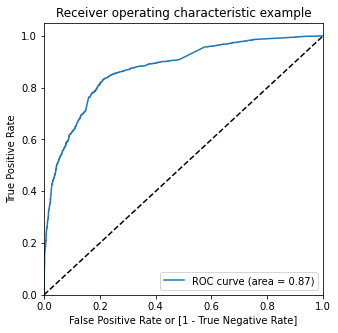

In [167]:
#Drawing the ROC plot
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [168]:
#AUC value is 0.87. This a good value to proceed

## Step 11: Finding Optimal Cutoff Point

Optimal cutoff probability is that probabilty where we get balanced sensitivity and specificity

In [169]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.532726,1943,1,1,1,1,1,1,1,0,0,0,0
1,0,0.064701,456,0,1,0,0,0,0,0,0,0,0,0
2,0,0.450077,6547,0,1,1,1,1,1,0,0,0,0,0
3,0,0.685467,8836,1,1,1,1,1,1,1,1,0,0,0
4,1,0.966054,6529,1,1,1,1,1,1,1,1,1,1,1


In [170]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373799  1.000000  0.000000
0.1   0.1  0.558022  0.975569  0.308775
0.2   0.2  0.749488  0.879528  0.671863
0.3   0.3  0.800976  0.837405  0.779231
0.4   0.4  0.810266  0.779275  0.828765
0.5   0.5  0.798299  0.652485  0.885341
0.6   0.6  0.793103  0.572452  0.924818
0.7   0.7  0.785703  0.502949  0.954488
0.8   0.8  0.750276  0.371525  0.976364
0.9   0.9  0.716265  0.257372  0.990194


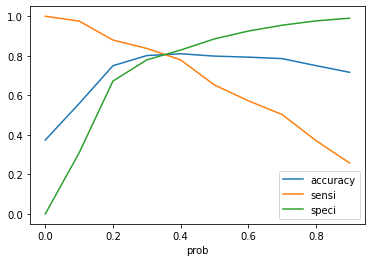

In [171]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**From the curve above, 0.36 is the optimum point to take it as a cutoff probability**

In [172]:
# creating final prediction for conversion with cutoff probabilty of 0.36
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.36 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.532726,1943,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.064701,456,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.450077,6547,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.685467,8836,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.966054,6529,1,1,1,1,1,1,1,1,1,1,1,1


In [173]:
#Adding the column lead score
y_train_pred_final['LeadScore']=y_train_pred_final['Converted_Prob']*100


In [174]:
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,LeadScore
0,0,0.532726,1943,1,1,1,1,1,1,1,0,0,0,0,1,53.272599
1,0,0.064701,456,0,1,0,0,0,0,0,0,0,0,0,0,6.470084
2,0,0.450077,6547,0,1,1,1,1,1,0,0,0,0,0,1,45.007733
3,0,0.685467,8836,1,1,1,1,1,1,1,1,0,0,0,1,68.546664
4,1,0.966054,6529,1,1,1,1,1,1,1,1,1,1,1,1,96.605415


In [175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8063297118564006

In [176]:
# We observe that the accuracy has slightly improved 

In [177]:
#creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3219,  758],
       [ 472, 1902]], dtype=int64)

In [178]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [179]:
# Calculating the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8011794439764112

In [180]:
# Let us calculate specificity
TN / float(TN+FP)

0.8094040734221776

In [181]:
# Calculate false postive rate - predicting conversion when customer does not have converted
print(FP/ float(TN+FP))

0.19059592657782248


In [182]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7150375939849624


In [183]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8721213763207802


**We observe that fixing the cutoff probability to 0.36 resulted with accuracy of model = 80.63%
Sensitivity = 80.11%
Specificity = 80.94%**

The accuracy hand senstivity has improved by changing the cutoff probability

## Precision and Recall

**Precision**

TP / TP + FP

In [184]:
##Calculating precision metric
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7150375939849624

**Recall**

TP / TP + FN

In [185]:
#Calculating Recall metric
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8011794439764112

In [186]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7150375939849624

In [187]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8011794439764112

In [188]:
#Precesion value of the model 88.67%  recall = 91.06%
# Alternatively these metrics may be used to analyse the model

## Precision and recall tradeoff

In [189]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: final_predicted, Length: 6351, dtype: int64)

In [190]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

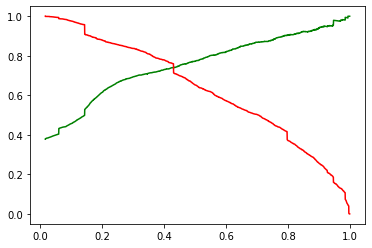

In [191]:
#Plotting thresholds for finding optimum value for precision recall curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [192]:
#If we use precision recall metrics the threshold probabilty may be  0.42

## Step 12: Making predictions on the test set

In [193]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [194]:
#Reviewing top 5 columns in test set
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct traffic,Lead Source_Organic search,Lead Source_Welingak website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
465,0,-0.250009,0,0,0,0,0,0,0,0,0,0,0
5424,0,0.361195,0,0,1,0,0,0,0,0,0,0,0
3503,0,-0.892323,0,0,0,0,0,0,0,0,0,0,0
4465,0,-0.892323,0,0,0,0,0,0,1,0,0,0,0
5394,0,-0.592210,0,0,0,0,0,0,0,0,0,0,0


In [195]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

**Making predictions on the test set**

In [196]:
y_test_pred = res.predict(X_test_sm)

In [197]:
#checking values predicted on test set
y_test_pred[:10]

465     0.237849
5424    0.280482
3503    0.142610
4465    0.058884
5394    0.182461
7831    0.132836
2314    0.929629
7042    0.891057
5428    0.142610
4349    0.200225
dtype: float64

In [198]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [199]:
# Checking the top 5 rows
y_pred_1.head()

,0
465,0.237849
5424,0.280482
3503,0.142610
4465,0.058884
5394,0.182461


In [200]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [201]:
# Putting LeadID to index
y_test_df['LeadID'] = y_test_df.index

In [202]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [203]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [204]:
y_pred_final.head()

,Converted,LeadID,0
0,0,465,0.237849
1,0,5424,0.280482
2,0,3503,0.142610
3,0,4465,0.058884
4,0,5394,0.182461


In [205]:
# Renaming the column 0 with Converted_Prob
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [206]:
# Adding the column Lead score
y_pred_final['LeadScore'] = y_pred_final['Converted_Prob']*100

In [207]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,LeadID,Converted_Prob,LeadScore
0,0,465,0.237849,23.784867
1,0,5424,0.280482,28.048224
2,0,3503,0.142610,14.260984
3,0,4465,0.058884,5.888446
4,0,5394,0.182461,18.246093


In [208]:
#using probabilty cutoff of 0.36 as from ROC predicting for test set
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.36 else 0)

In [209]:
y_pred_final.head()

,Converted,LeadID,Converted_Prob,LeadScore,final_predicted
0,0,465,0.237849,23.784867,0
1,0,5424,0.280482,28.048224,0
2,0,3503,0.142610,14.260984,0
3,0,4465,0.058884,5.888446,0
4,0,5394,0.182461,18.246093,0


In [210]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8090341535071612

In [211]:
#creating confusion matrix with test set 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1351,  311],
       [ 209,  852]], dtype=int64)

In [212]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [213]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8030160226201697

In [214]:
# Let us calculate specificity
TN / float(TN+FP)

0.8128760529482552

**Performance of test set
Accuracy= 80.9%
Sensitivity = 80.3%
Specificity = 81.28%**

## Conclusion

The final model had 13 variables


**The final model consisted of following variables making positive impact**

Total Time Spent on Website,Lead Origin_Lead Add Form, Lead Source_Welingak website,What is your current occupation_working Professional, Last notable activity_Had a phone conversation 

**Variables affecting negatively**

Do not Email, Lead Source _Direct traffic, Lead Source_Organic search, Last Activity_Email Bounced, Last Activity, Olark Chat Conversation

**Performance on the training set**



**We observe that fixing the cutoff probability to 0.36 resulted with accuracy of model = 80.63% Sensitivity = 80.11% Specificity = 80.94%**

**Performance of test set**

**Accuracy= 80.9% Sensitivity = 80.3% Specificity = 81.28%**

**Insights** 

We must definitely target working professionals who are spending lot of time on the website browsing courses

The Accuracy,Sensivity, specificity  we got from train and test set in acceptable range.
In business terms, this model is stable and has the ability to adjust with the company’s requirements

**Recommendation**

Reduce cutoff for communicating to more potentials when target is high & increase the cutoff for communicating to selected highest potentials when target is relaxed.
